# <center>Setup LandBOSSE</center>

In [26]:
import os
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import pandas as pd

from landbosse.excelio import XlsxSerialManagerRunner
from landbosse.excelio import XlsxParallelManagerRunner
from landbosse.excelio import XlsxGenerator
from landbosse.excelio import XlsxValidator
from landbosse.excelio import CsvGenerator

# When not running Binder and you want to provide your own input data, set_path to False:
set_path = True

# When running Binder set to True
running_binder = False

# LandBOSSE, small utility functions
from landbosse.excelio import XlsxFileOperations
if running_binder == True:
    binder_dir = os.path.join(os.getcwd(), 'jovyan')
    input_output_path = os.path.dirname(binder_dir)
else: 
    if set_path:
        input_output_path = '~/Desktop/'
    else:
        input_output_path = os.path.dirname(os.path.join(os.getcwd(), 'input'))

os.environ["LANDBOSSE_INPUT_DIR"] = input_output_path

<br/><br/>
# <center>Run LandBOSSE</center>

In [27]:
if __name__ == '__main__':
    # Print start timestamp
    print(f'>>>>>>>> Begin run {datetime.now()} <<<<<<<<<<')

    # The file_ops object handles file names for input and output data.
    file_ops = XlsxFileOperations()

    run_parallel = False
    manager_runner = XlsxParallelManagerRunner(file_ops) if run_parallel else XlsxSerialManagerRunner(file_ops)

    # project_xlsx is the absolute path of the project_list.xlsx
    projects_xlsx = os.path.join(file_ops.landbosse_input_dir(), 'project_list.xlsx')

    validation_enabled = False
    
    # final_result aggregates all the results from all the projects.
    final_result = manager_runner.run_from_project_list_xlsx(projects_xlsx, validation_enabled)

    print('Simulation Successful!')
#     print('Results: ')
#     print('')

>>>>>>>> Begin run 2022-07-28 11:25:02.439222 <<<<<<<<<<

>>> project_id: ge15_dist_165
>>> Project data: ~/Desktop/project_data/ge15_public.xlsx

Simulation Successful!


<br/><br/>
# <center>Collect BOS CapEx Results</center>

In [28]:
    # print(final_result)
    total_collection_cost = final_result['jp_collectioncost_total']
    total_development_cost = final_result['jp_developmentcost_total']
    total_erection_cost = final_result['jp_erectioncost_total']
    total_foundation_cost = final_result['jp_foundationcost_total']
    total_gridconnection_cost = final_result['jp_gridconnectioncost_total']
    total_management_cost = final_result['total_management_cost']
    total_sitepreparation_cost = final_result['jp_sitepreperationcost_total']
    total_substation_cost = final_result['jp_substationcost_total']

    total_bos_cost = \
        total_collection_cost + \
        total_development_cost + \
        total_erection_cost + \
        total_foundation_cost + \
        total_gridconnection_cost + \
        total_management_cost + \
        total_sitepreparation_cost + \
        total_substation_cost
    
    plant_capacity_kW = final_result['plant_capacity_MW'] * 1000
        
    total_bos_cost_kW = total_bos_cost / plant_capacity_kW
    
    print('Plant Size MW: ', final_result['plant_capacity_MW'])
    
    print('Collection Cost ($/kW): ', round(total_collection_cost / plant_capacity_kW))
    print('Development Cost ($/kW): ', round(total_development_cost / plant_capacity_kW))
    print('Erection Cost ($/kW): ', round(total_erection_cost / plant_capacity_kW))
    print('Foundation Cost ($/kW): ', round(total_foundation_cost / plant_capacity_kW))
    print('Grid Connection Cost ($/kW): ', round(total_gridconnection_cost / plant_capacity_kW))
    print('Management Cost ($/kW): ', round(total_management_cost / plant_capacity_kW))
    print('Site Preparation Cost ($/kW): ', round(total_sitepreparation_cost / plant_capacity_kW))
    print('Substation Cost ($/kW): ', round(total_substation_cost / plant_capacity_kW))
    print('')
   
    

Plant Size MW:  150.0
Collection Cost ($/kW):  46
Development Cost ($/kW):  1
Erection Cost ($/kW):  41
Foundation Cost ($/kW):  68
Grid Connection Cost ($/kW):  0
Management Cost ($/kW):  10
Site Preparation Cost ($/kW):  31
Substation Cost ($/kW):  23



<br/><br/>
# <center>Collect Financial CapEx Results</center>

In [29]:
    ## Financial CapEx breakdown: 
    financial_costs_kW = 122 
    construction_financing_cost = 34
    contingency_fund = 88

<br/><br/>
# <center>Collect Turbine CapEx Results</center>

In [30]:
    ## Turbine CapEx breakdown: 
    turbine_capex_kW = 1021
    
    # Rotor cost and breakdown:
    rotor_cost = 311
    pitch_assembly = 201
    hub_assembly = 47
    
    # Nacelle cost and breakdown: 
    nacelle_module = 508
    nacelle_structural_assembly = 102
    drivetrain_assembly = 203
    nacelle_electrical_assembly = 164
    yaw_assembly = 38
    
    # Tower cost
    tower_module = 203
    
    print('Total BOS CapEx ($/kW): ', round(total_bos_cost_kW))
    print('Financial Costs ($/kW): ', financial_costs_kW)    
    print('Turbine CapEx ($/kW): ', turbine_capex_kW)
    print('Total Project CapEx ($/kW): ', round(total_bos_cost_kW + financial_costs_kW + turbine_capex_kW))

Total BOS CapEx ($/kW):  220
Financial Costs ($/kW):  122
Turbine CapEx ($/kW):  1021
Total Project CapEx ($/kW):  1363


<br/><br/>
# <center>Collect OpEx, FCR, Net AEP, LCOE, and CF Costs</center>

In [31]:
opex_usd_kw_yr = 43    # User Input - Cost obtained from LBNL Market Report from LBW (could be replaced w/ WOMBAT in the future)
fcr = 5.78    # User Input - Obtained from LBNL 
net_aep = 3703    # From SAM (losses = 16.1% - Availability Losses)
net_cf = 42.3    # From SAM (losses = 16.1% - Availability Losses)
lcoe = 34    # From SAM (losses = 16.1% - Availability Losses)

<br/><br/>
# <center>Figure ES1. Donut Plot - CapEx for the land-based reference wind power plant project</center>

([<matplotlib.patches.Wedge at 0x7faa7edb9250>,
 [Text(-0.4681374893040258, -0.4652389612963677, ''),
  Text(0.6352075440019048, 0.17919647329975052, ''),
  Text(0.32065865284300266, 0.5768691605181462, '')],
 [Text(-0.5319744196636658, -0.5286806378367814, '74.9%'),
  Text(0.721826754547619, 0.20363235602244378, '8.9%'),
  Text(0.3643848327761394, 0.6555331369524389, '16.1%')])

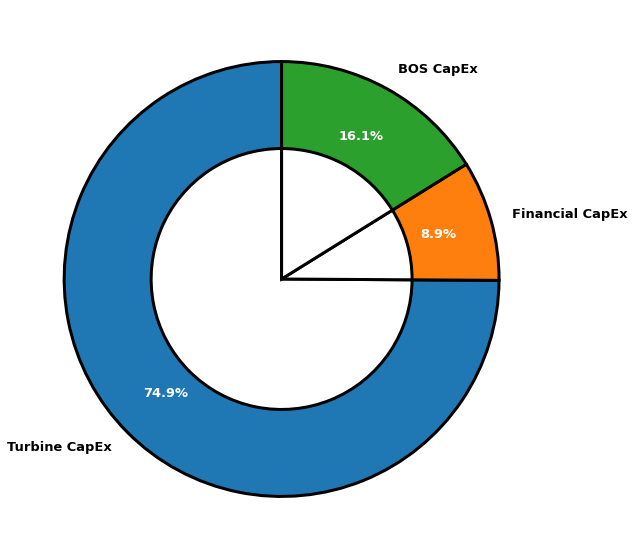

In [32]:
#     # Plot
#     start_angle = -180
#     plt.figure(figsize=(10,10))
#     names = ['Rotor', 'Nacelle', 'Tower', 'Contingency', 'Construction Finance', 'BOS CapEx']
#     size = [rotor_cost, nacelle_module, tower_module, contingency_fund, construction_financing_cost, total_bos_cost_kW]

#     plt.pie(size, labels = names, 
#            startangle=start_angle,
#            autopct = '%1.1f%%', pctdistance = 0.9,
#             colors = 'none',
#             radius= 1.0, 
#             labeldistance=1.1,
#             textprops ={'fontweight': 'bold', 'fontsize':13, 'color': "black"},
#             wedgeprops = {'linewidth' : 3, 'edgecolor' : "black" }) 

#     no_color = 'w'
#     plt.pie(size, labels = names, 
#             startangle=start_angle,
#             autopct = '%1.1f%%', pctdistance = 0.9,
#             colors = [no_color],
#             radius= 1.0, 
#             labeldistance=1.1,
#             textprops={'fontweight': 'bold', 'fontsize':13, 'color': "white"},
#             wedgeprops = {'linewidth' : 3, 'edgecolor' : "black" }) 
    
#     # Internal Pies
#     sub_names = ['Turbine CapEx', 'Financial CapEx', 'BOS CapEx']
#     a = 'white'
#     sub_size = [turbine_capex_kW, financial_costs_kW, total_bos_cost_kW]
    
    
#     plt.pie(sub_size,startangle=start_angle, pctdistance =1.25, 
# #             autopct = '%1.1f%%',
#             radius= 0.60, colors=[a, a, a],
#             textprops ={'fontweight': 'bold' ,'fontsize':13, 'color': "white"}, 
#             wedgeprops = {'linewidth' : 3, 'edgecolor' : "black" } )
    
    
#     plt.pie(sub_size,
#             startangle=start_angle, 
# #             labeldistance =0.65, labels = sub_names,
#             radius= 0.60, colors=[a, a, a],
#             textprops ={'fontweight': 'bold' ,'fontsize':10, 'color': "black"}, 
#             wedgeprops = {'linewidth' : 3, 'edgecolor' : "black" } )
 
#     # show it
#     plt.show()
# Plot
plt.figure(figsize=(10,10))
names = ['Turbine CapEx', 'Financial CapEx', 'BOS CapEx']
size = [turbine_capex_kW, financial_costs_kW, total_bos_cost_kW]
plt.pie(size, labels = names, 
           startangle=90,
           radius= 1.0, labeldistance=1.1,
           textprops ={'fontweight': 'bold', 'fontsize':13, 'color': "black"},
           wedgeprops = {'linewidth' : 3, 'edgecolor' : "black" }) 
    
a = 'white'
plt.pie(size,startangle=90, pctdistance =1.25, autopct = '%1.1f%%',
        radius= 0.60, colors=[a, a, a],
       textprops ={'fontweight': 'bold' ,'fontsize':13, 'color': "white"}, 
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "black" } )

<br/><br/>
# <center>Table ES1. Summary of the Land-Based Reference Project Using 2.8-megawatt (MW) Wind Turbines

In [33]:
import pandas as pd

column_names = pd.DataFrame([["2.8-MW Land-Based Wind Turbine", "($/kilowatt [kW])"], 
                             ["8.0-MW Offshore Wind Turbine", "($/kilowatt [kW])"], 
                             ["8.0-MW Floating Offshore Wind Turbine", "($/kilowatt [kW])"], 
                             ["20-kW Residential Wind Turbine", "($/kilowatt [kW])"], 
                             ["100-kW Commercial Wind Turbine", "($/kilowatt [kW])"]], 
                             columns=["", ""])
na = "Pending" 
rows = [[turbine_capex_kW, na, na, na, na],
        [round(total_bos_cost_kW), na, na, na, na],
        [financial_costs_kW, na, na, na, na],
        ["", "", "", "", ""],        
        [opex_usd_kw_yr, na, na, na, na],         
        [fcr, na, na, na, na],
        [net_aep, na, na, na, na],        
        [net_cf, na, na, na, na],         
        [lcoe, na, na, na, na]]

columns = pd.MultiIndex.from_frame(column_names)
index = ["Turbine Capital Cost (CapEx)",
         "Balance of System (BOS CapEx)",
         "Financial Cost (Financial CapEx)",
         "  ",
         "OpEx ($/kW/yr)",
         "FCR (real) [%]",
         "Net Annual Energy Production (MWh/MW/yr)",
         "Net Capacity Factor (%)",
         "LCOE ($/MWh)"
        ]

df = pd.DataFrame(rows, columns=columns, index=index)

# def highlight_max(x):
#     return ['font-weight: bold' if v == x.loc[4] else ''
#                 for v in x]

# df.style.apply(highlight_max)

display(df)


,2.8-MW Land-Based Wind Turbine,8.0-MW Offshore Wind Turbine,8.0-MW Floating Offshore Wind Turbine,20-kW Residential Wind Turbine,100-kW Commercial Wind Turbine
,($/kilowatt [kW]),($/kilowatt [kW]),($/kilowatt [kW]),($/kilowatt [kW]),($/kilowatt [kW])
Turbine Capital Cost (CapEx),1021,Pending,Pending,Pending,Pending
Balance of System (BOS CapEx),220,Pending,Pending,Pending,Pending
Financial Cost (Financial CapEx),122,Pending,Pending,Pending,Pending
,,,,,
OpEx ($/kW/yr),43,Pending,Pending,Pending,Pending
FCR (real) [%],5.78,Pending,Pending,Pending,Pending
Net Annual Energy Production (MWh/MW/yr),3703,Pending,Pending,Pending,Pending
Net Capacity Factor (%),42.3,Pending,Pending,Pending,Pending
LCOE ($/MWh),34,Pending,Pending,Pending,Pending


<br/><br/>
# <center>Figure ES5. Land-based wind power plant assumptions and ranges for key LCOE input parameters.

In [49]:
# Tornado chart template obtained from 
# https://python.plainenglish.io/how-to-create-a-beautify-tornado-chart-in-python-plotly-6c0519e185b4

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

# fig = go.Figure()
# x_axis = ['CapEx ($/kW)', 
#           'OpEx ($/kW/yr)', 
#           'Net Capacity Factor (%)', 
#           'Discount Rate (nominal [%]', 
#           'Project Design Life (years)')]

# fig.add_trace(go.Bar(x=x_axis, y=sr1,
#                 base=0,
#                 marker_color='rgb(158,202,225)',
#                 name='Revenue'))
# fig.add_trace(go.Bar(x=years, y=sr2,
#                 #base=sr3,
#                 marker_color='crimson',
#                 name='COGS<br>(Cost of Goods Sold)'))fig.show()


years = ['Project Design Life (years)',
         'Discount Rate (nominal [%]',
         'Net Capacity Factor (%)',
         'OpEx ($/kW/yr)',
         'CapEx ($/kW)']

# years = ['CapEx ($/kW)', 
#           'OpEx ($/kW/yr)', 
#           'Net Capacity Factor (%)', 
#           'Discount Rate (nominal [%]', 
#           'Project Design Life (years)')]

upper_capex = 26
upper_opex = 31
upper_net_cf = 25
upper_discount_rate = 33
upper_project_design_life = 30
upper_bound = [upper_project_design_life, 
               upper_discount_rate, 
               upper_net_cf,
               upper_opex,
               upper_capex]

# sr2=[141702, 163826, 162264,170143,212981]
lower_capex = 26
lower_opex = 31
lower_net_cf = 25
lower_discount_rate = 33
lower_project_design_life = 30
lower_bound = [lower_project_design_life, 
               lower_discount_rate, 
               lower_net_cf,
               lower_opex,
               lower_capex]

#convert lower_bound to negative values
def Convert(lst):
    return [ -i for i in lst ]

negative_lower_bound = Convert(lower_bound)

fig = go.Figure()

fig.add_trace(go.Bar(y=years, x=lower_bound,
                base=0,
                marker_color='rgb(158,202,225)',
                name='Revenue',
                marker_line_color='rgb(8,48,107)',
                orientation='h',
                marker_line_width=1.5,
                opacity= 0.7,
                text = lower_bound,
                textposition='auto',
#                 texttemplate = "%{x:,s}(M$) ",
                texttemplate = "%{x:,s}"))

fig.add_trace(go.Bar(y=years, x=lower_bound,
                base= negative_lower_bound,
                marker_color='crimson',
                name='COGS<br>(Cost of Goods Sold)',
                marker_line_color='red',
                orientation='h',
                marker_line_width=1.5,
                opacity= 0.7,
                text = negative_lower_bound,
                textposition='auto',
#                 texttemplate = "%{x:,s}(M$) ",
                texttemplate = "%{x:,s} ",
              ))

fig.update_layout(height=500,
                  margin=dict(t=50,l=10,b=10,r=10),title_text="Land-based wind power plant assumptions and ranges for key LCOE input parameters",
                  title_font_family="sans-serif",
                  #legend_title_text=’Financials’,
                  title_font_size = 25,
                  title_font_color="darkblue",
                  title_x=0.5 #to adjust the position along x-axis of the title
                 )

fig.update_layout(
                  barmode='overlay', 
                  xaxis_tickangle=-45, 
#                   legend=dict(x=0.80,
#                               y=0.01,
#                               bgcolor='rgba(255, 255, 255, 0)',
#                               bordercolor='rgba(255, 255, 255, 0)'
#                              ),
                  yaxis=dict(
                             # title='Year', 
                             titlefont_size=16, 
                             tickfont_size=14),
                  bargap=0.30
                 )

fig.show()

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'